Example of data visualization by pareto front.

Begin by generating some synthetic data to analyze...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#generate some synthetic data to analysis
rnum = 200
np.random.uniform(0,1,rnum)
k1 = np.random.uniform(0,1,rnum)
k2 = np.random.uniform(0,1,rnum)
k3 = np.random.uniform(0,1,rnum)

x1 = -(1+k2)*np.sin(0.5*np.pi*k1)+0.4*k2-0.8*k3+0.1*np.random.normal(0,1,rnum)
x2 = -(1+k2)*np.cos(0.5*np.pi*k1)-0.6*k2+0.2*k3+0.1*np.random.normal(0,1,rnum)

Plot X1, X2 vs k1, k2, k3

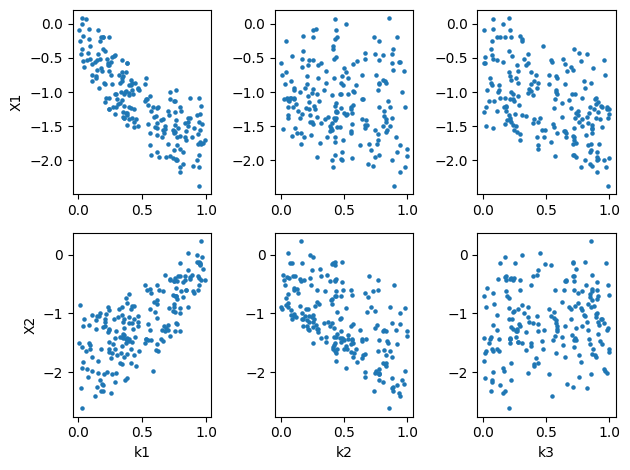

In [2]:
#Use Subfigure to look at X1, X2 vs k1, k2, k3
fig, ax = plt.subplots(2, 3)
msc = 5
ax[0, 0].scatter(k1, x1,s=msc)
ax[0, 1].scatter(k2, x1,s=msc)
ax[0, 2].scatter(k3, x1,s=msc)
ax[1, 0].scatter(k1, x2,s=msc)
ax[1, 1].scatter(k2, x2,s=msc)
ax[1, 2].scatter(k3, x2,s=msc)
ax[0, 0].set_ylabel('X1')
ax[1, 0].set_xlabel('k1')
ax[1, 0].set_ylabel('X2')
ax[1, 1].set_xlabel('k2')
ax[1, 2].set_xlabel('k3')
fig.tight_layout()
plt.show()

But what k values will minimize X1 and X2 are the same time?

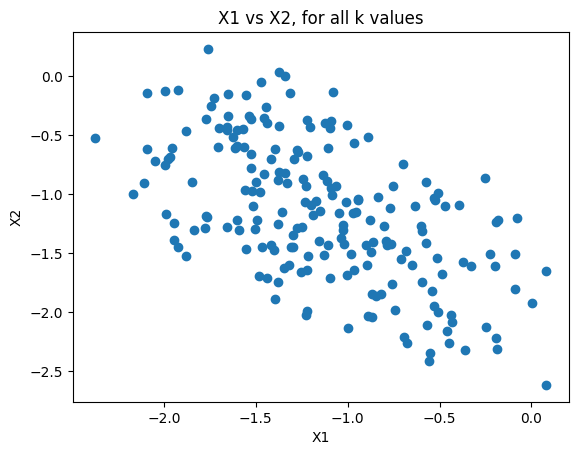

In [3]:
#Look at X1 vs X2 on scatterplot
plt.scatter(x1,x2)
plt.title('X1 vs X2, for all k values')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Now I can clearly see which points are the best, then look up the corresponding k-values...

The best values are known as the Pareto Front, and we can calculate that explicitly

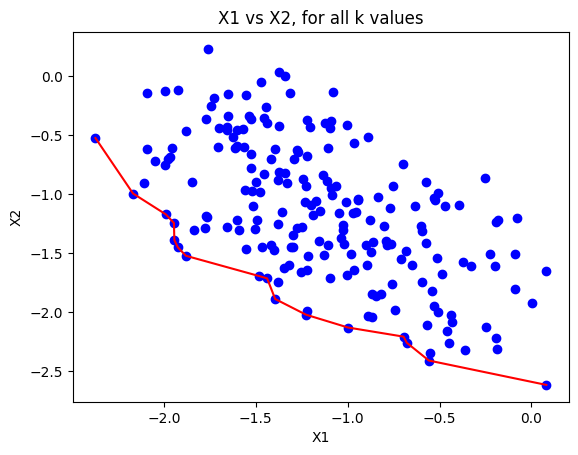

In [4]:
#p1, p2 will be the values of x1, x2 on the pareto front
p1 = []
p2 = []
lp = 0
left1 = x1
left2 = x2
while(len(left1) > 0):
  #Point with the minimum x1, of whats left
  p1.append(np.min(left1))
  p2.append(left2[np.argmin(left1)])
  #narrow whats left to points small on x2
  left1 = left1[left2 < p2[lp]]
  left2 = left2[left2 < p2[lp]]
  lp=lp+1

#Plot Scatterplot again with Pareto Front
plt.scatter(x1,x2,color='blue')
plt.plot(p1,p2,color='red')
plt.title('X1 vs X2, for all k values')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()